## Object Detection and Segmentation ##

#### Installing and Importing required libraries 

In [1]:
!pip install opencv-python

     |████████████████████████████████| 60.4 MB 57 kB/s              


In [2]:
#Importing opencv library
import cv2

In [3]:
#Importing ML and Data visualisation library
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


### Using Mobilnet Neural Network ###

In [4]:
#Loading configuration file and model file from MobileNet nural network
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [5]:
#Creating model through DNN detection model
model=cv2.dnn_DetectionModel(frozen_model, config_file)

In [6]:
#Creating object label with object name
classlabels=[]
filename = 'Labels.txt'
with open(filename, 'rt') as fl:
    classlabels=fl.read().rstrip('\n').split('\n')
    

In [7]:
print(classlabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [8]:
print(len(classlabels)) # There are total 80 class label

80


#### Reading an image and create object

In [9]:
img = cv2.imread('image_000000001.jpg')

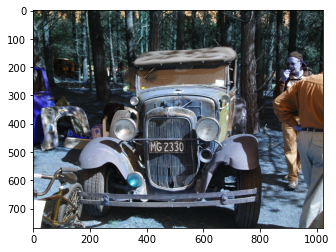

In [10]:
plt.imshow(img)
#This is a BGR(Blue Green Red) image

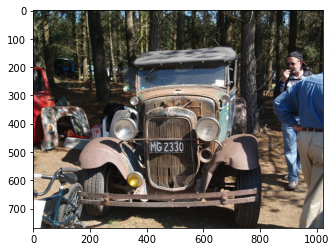

In [11]:
#Showing BGR image to RGB(Red Green Blue) image which is original image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [12]:
#Doing above image converting process automaically by model parameter
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean ((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

<dnn_Model 0x7f76dd900490>

In [13]:
ClassIndex, confidence, bbox= model.detect(img, confThreshold=0.5)

In [14]:
print(ClassIndex)
print(confidence)
print(bbox)

[8 1 2]
[0.71178    0.7013386  0.51657456]
[[ 72  91 735 671]
 [853 156 164 486]
 [  6 549 288 218]]


In [15]:
#Using below method for flattening the label and create rectangular box

font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for Classindex, confid, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255, 0, 0), 2)
    cv2.putText(img, classlabels[Classindex-1].upper(), (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0,255,0),thickness=3)

    #classlabels[Classindex-1].upper() using this upper keyword, will give the object name with uppercase.

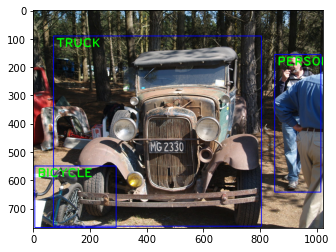

In [16]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB),)
#Objects are detected into this image

### Object detection in video ###

In [ ]:
cap=cv2.VideoCapture('Car Racing - 74.mp4')

if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError ('can not open video')
    
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame=cap.read()
    ClassIndex, confidence, bbox= model.detect(frame, confThreshold=0.55)
    print (ClassIndex)
    
    if (len(ClassIndex)!=0):
        for Classindex, confid, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if (Classindex<=80):
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classlabels[Classindex-1].upper(), (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0,255,0),thickness=3)
    
    cv2.imshow('Object-Detection', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()
                
            